# 2. Laboratorijske vježbe iz Numeričke matematike- zad 6

Ime i prezime: Tomislav Bjelčić

Zadan je eliptički integral 
$$K(x)=\int_0^{\frac{\pi}{2}}\frac{1}{\sqrt{1-x^2\sin^2\theta}}d\theta$$

a) Napišite program koji računa vrijednost ovog integrala za zadane ulazne vrijednosti od $x$. Konkretno unutar intervala $[0 ,\  0.9]$ odredite ekvidistantno raspoređene točke $x_i,\quad i=0,1,2,\ldots, n$, za primjerice $n=20$, te izračunajte vrijednost gornjeg integrala koristeći kompozitnu trapeznu formulu ( možete sami implementirati formulu  ili iskoristiti već ugrađene funkcije). Dobivene vrijednosti pospremite u vektor $y=(y_0,y_1,\ldots,y_n)$
Na temelju dobivenih podataka grafički prikažite funkciju $K(x)$ na intervalu $[0,\  0.9]$.

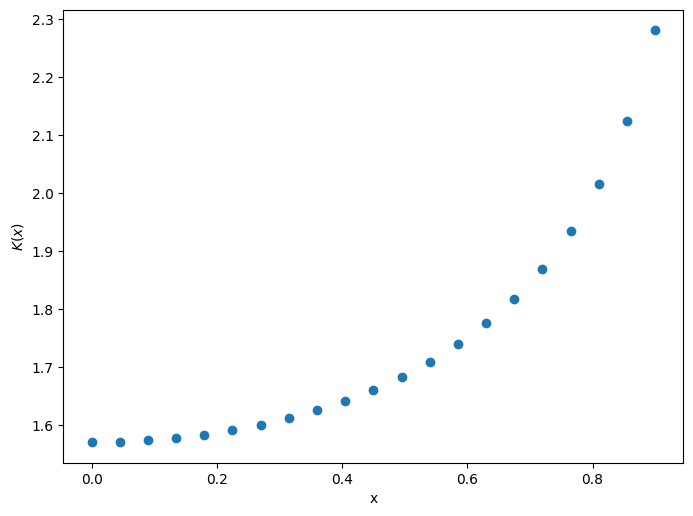

In [1]:
# Ovdje ide kod i graf
import numpy as np
import matplotlib.pyplot as plt
plt.rcParamsDefault["figure.figsize"] = (8, 6)
plt.rcParamsDefault["figure.dpi"] = 100
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.rcParams["figure.dpi"] = plt.rcParamsDefault["figure.dpi"]

def f(x, phi):
    return 1.0/np.sqrt(1 - np.square(x * np.sin(phi)))



n = 20
num_intervals_phi = 1000
xs = np.linspace(start=0, stop=0.9, num=n+1, endpoint=True)
phi_mesh = np.linspace(start=0, stop=np.pi/2, num=num_intervals_phi+1, endpoint=True)
ys = np.array([np.trapz(y=f(x, phi_mesh), x=phi_mesh) for x in xs])

# plt.plot(xs, ys)
plt.scatter(xs, ys)
plt.xlabel("x")
plt.ylabel("$K (x)$")
plt.show()

b) Dobivene podatke interpolirajte najprije koristeći polinomijalnu interpolaciju te potom koristeći kubni splajn ( možete iskoristiti već ugrađene funkcije).  Dobiveni interpolacijski polinom i splajn prikažite grafički (kubni splajn i polinom prilikom prikaza izvrijednite u   više točaka nego što je zadano u a) dijelu, primjerice u 100 točaka na intervalu $[0, 0.9]$ da dobijete glatki prikaz)

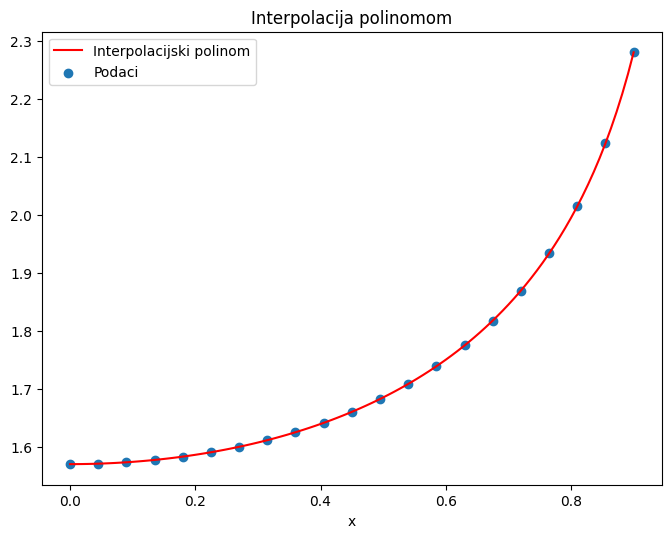

In [2]:
# Ovdje ide kod 
import scipy
from scipy.interpolate import CubicSpline
from numpy.polynomial.polynomial import Polynomial

num_points_domain = 100
xs_domain = np.linspace(start=0, stop=0.9, num=num_points_domain, endpoint=True)
polynomial = Polynomial.fit(xs, ys, deg=n)
spline = CubicSpline(xs, ys)

ys_domain_poly = polynomial(xs_domain)
ys_domain_spline = spline(xs_domain)

plt.plot(xs_domain, ys_domain_poly, c="r", label="Interpolacijski polinom")
plt.scatter(xs, ys, label="Podaci")
plt.legend(loc="best")
plt.title("Interpolacija polinomom")
plt.xlabel("x")
plt.show()

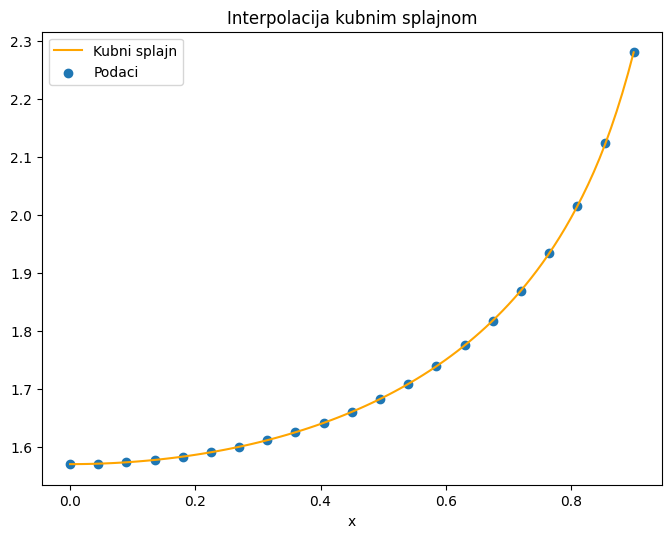

In [3]:
plt.plot(xs_domain, ys_domain_spline, c="orange", label="Kubni splajn")
plt.scatter(xs, ys, label="Podaci")
plt.legend(loc="best")
plt.title("Interpolacija kubnim splajnom")
plt.xlabel("x")
plt.show()

c)Izračunajte aproksimaciju navedenog integrala u točki $x=\frac{1}{3}$ koristeći dobivene aproksimacije iz b) dijela zadatka. Usporedite s pravom vrijednošću ovog integrala koju možete dobiti koristeći [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.ellipk.html)

In [4]:
# Ovdje sada idu grafovi
x = 1./3

K_real = scipy.special.ellipk(x*x)
K_approx_poly = polynomial(x)
K_approx_spline = spline(x)

print(f"Prava vrijednost K(1/3) = {K_real}")
print(f"Aproksimacija polinomijalnom interpolacijom: {K_approx_poly}, err = {np.abs(K_real - K_approx_poly)}")
print(f"Aproksimacija kubnim splajnom: {K_approx_spline}, err = {np.abs(K_approx_spline - K_real)}")


Prava vrijednost K(1/3) = 1.6173867356247325
Aproksimacija polinomijalnom interpolacijom: 1.6173867356766858, err = 5.195333052654405e-11
Aproksimacija kubnim splajnom: 1.6173865859738856, err = 1.4965084682572183e-07


d) Napišite kratak zaključak, koja interpolacija je po vašem mišljenju bolji izbor za $n=20.$

Za $n = 20$ polinomijalna interpolacija se čini kao malo bolji izbor jer je stupanj interpolacijskog polinoma još dovoljno malen da nedostaci polinomijalne interpolacije ne dođu do izražaja. Promotrimo što se događa kada se poveća $n$ i kada $x$ nije iz intervala $\left[0, 0.9\right]$ (ali kada su zadani podaci i dalje unutar intervala $\left[0, 0.9\right]$). Podintegralna funkcija kod eliptičkog integrala za $x^2 \geq 1$ nije neprekidna na intervalu $\theta \in \left[0, \frac{\pi}{2}\right]$. Uz to, funkcija $K (x)$ je parna, pa promotrimo samo intervale koji su većim dijelom pozitivni.

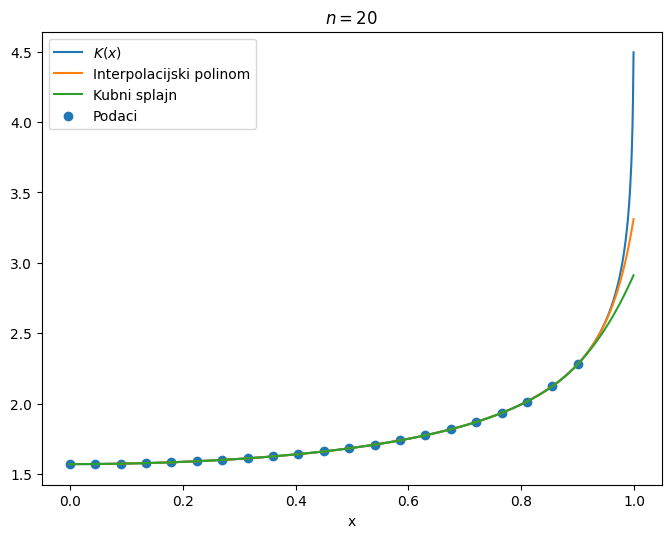

c:\Users\Tomek\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\polynomial\polynomial.py:1361: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


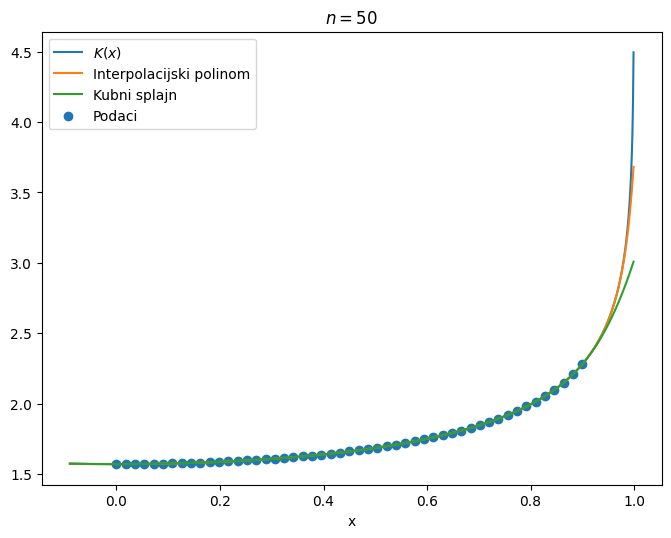

c:\Users\Tomek\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\polynomial\polynomial.py:1361: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


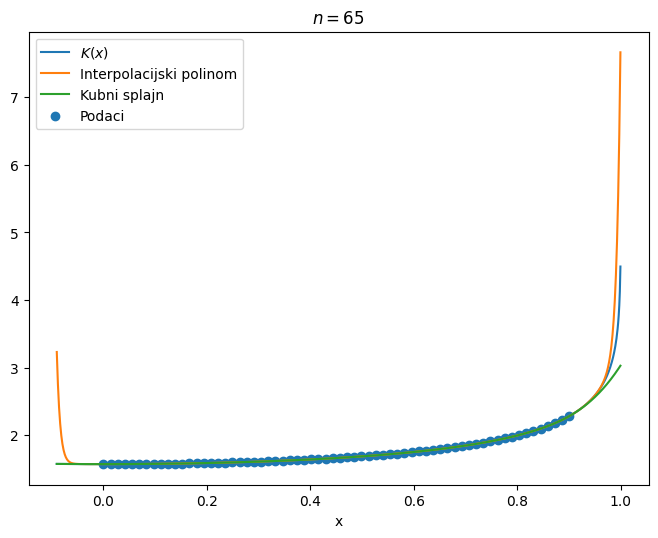

In [5]:
def demo(n, x_min=0.0, x_max=0.999, x_min_data=0.0, x_max_data=0.9, num_domain=1000):
    # podatke za interpolaciju umjesto korištenja trapezne formule korištena je funkcija ellipk
    x_data = np.linspace(start=x_min_data, stop=x_max_data, num=n+1, endpoint=True)
    y_data = scipy.special.ellipk(x_data * x_data)

    x_domain_extended = np.linspace(start=x_min, stop=x_max, num=num_domain, endpoint=True)
    y_domain_real = scipy.special.ellipk(x_domain_extended * x_domain_extended)

    _poly = Polynomial.fit(x_data, y_data, deg=n)
    _spline = CubicSpline(x_data, y_data)

    plt.scatter(x_data, y_data, label="Podaci")
    plt.plot(x_domain_extended, y_domain_real, label="$K (x)$")
    plt.plot(x_domain_extended, _poly(x_domain_extended), label="Interpolacijski polinom")
    plt.plot(x_domain_extended, _spline(x_domain_extended), label="Kubni splajn")
    plt.title(f"$n = {n}$")
    plt.xlabel("x")
    plt.legend(loc="best")
    plt.show()


demo(n=20) # početni primjer
demo(n=50, x_min=-0.09)
demo(n=65, x_min=-0.09)


Već za $n = 65$ do izražaja dolaze nedostaci polinomijalne interpolacije kad se pokušava aproksimirati $K (x)$ za argumente izvan intervala $\left[0, 0.9\right]$, i u tim slučajevima interpolacija kubnim splajnom je bolji izbor.